# Comment choisir le nombre parfait de dimensions avec l'Analyse en Composantes Principales (PCA) ?

[Lien du post MonShotData](https://www.monshotdata.com/p/comment-choisir-le-nombre-parfait-de-dimensions-avec-le-pca)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from sklearn.decomposition import PCA
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')
plt.style.use("seaborn-v0_8-darkgrid")
sns.set()

In [2]:
def percent_formatter(x, pos):
    return f"{x*100:.0f}%"

## Données fictives

In [3]:
# Valeurs moyennes pour les 10 dimensions
init_dimensions = 10

mean = np.zeros(init_dimensions)

# Variations pour les 10 dimensions
variances = np.array([10, 8, 6, 4, 2, 1, 0.5, 0.4, 0.3, 0.2])

# Matrice de covariance
cov_matrix = np.diag(variances)

# Générer un ensemble de données à 10 dimensions (1000 échantillons)
data = np.random.multivariate_normal(mean, cov_matrix, size=1000)

## Appliquer le PCA

In [4]:
pca = PCA()
pca.fit(data)

PCA()

In [5]:
exp_var = pca.explained_variance_ratio_  ## variance de la composante individuelle 

cumulative_explained_variance = np.cumsum(exp_var)  ## variance cumulée

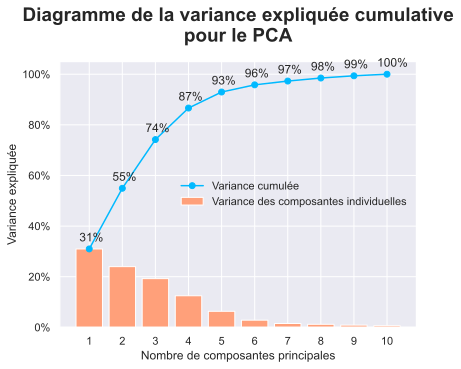

In [6]:
fig, ax = plt.subplots()

## ajouter des barres de variance individuelles
plt.bar(range(1, init_dimensions+1), exp_var, align='center',
        label='Variance des composantes individuelles', color = 'lightsalmon')

## ajouter une ligne de variance cumulative
plt.plot(range(1, init_dimensions+1), cumulative_explained_variance, marker="o",
         label='Variance cumulée', color='#00B9FF')

## ajouter l'annotation de la variance cumulative
for x, y in zip(range(1, init_dimensions+1), cumulative_explained_variance):
    ax.annotate(f"{round(y * 100):.0f}%", (x - 0.3, y + 0.03))

## ajouter une étiquette, un titre, des ticks
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
plt.title("Diagramme de la variance expliquée cumulative\npour le PCA", fontsize=19, fontweight="bold", pad=20)
plt.xticks(range(1, init_dimensions+1))

## format de l'axe des y
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))

## emplacement de la légende
plt.legend(loc='best')
plt.show()